In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor

In [2]:
df=pd.read_csv('datasets/House prices.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

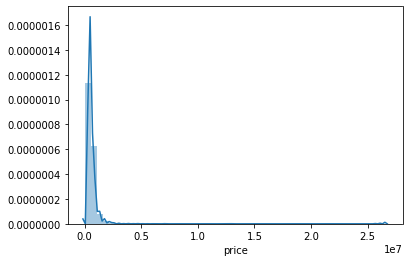

In [7]:
sns.distplot(df['price'])

In [14]:
df['zip_code']=df['statezip'].apply(lambda x : x[2:])

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,zip_code
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,98052


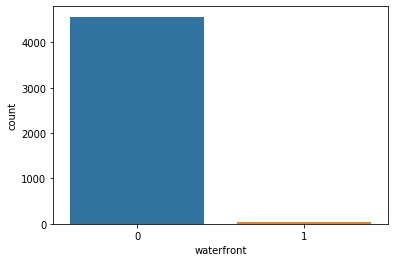

In [17]:
sns.countplot(df['waterfront'])

In [18]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'zip_code'],
      dtype='object')

In [20]:
x=df[['bedrooms','bathrooms','sqft_living','floors','yr_built','yr_renovated','zip_code']]
x

,bedrooms,bathrooms,sqft_living,floors,yr_built,yr_renovated,zip_code
0,3.0,1.50,1340,1.5,1955,2005,98133
1,5.0,2.50,3650,2.0,1921,0,98119
2,3.0,2.00,1930,1.0,1966,0,98042
3,3.0,2.25,2000,1.0,1963,0,98008
4,4.0,2.50,1940,1.0,1976,1992,98052
...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,1.0,1954,1979,98133
4596,3.0,2.50,1460,2.0,1983,2009,98007
4597,3.0,2.50,3010,2.0,2009,0,98059
4598,4.0,2.00,2090,1.0,1974,0,98178


In [21]:
y=df['price']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'XGBR':XGBRFRegressor(),
    'RF':RandomForestRegressor()
}

In [31]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    print(f'Train Accuracy: {model.score(x_train,y_train)}')
    print(f'Test Accuracy: {model.score(x_test,y_test)}')
    print('-'*30,'\n')

using: LR
Train Accuracy: 0.1814716342056295
Test Accuracy: 0.4868157773513395
------------------------------ 

using: KNN
Train Accuracy: 0.3589247470001544
Test Accuracy: 0.15147641156135605
------------------------------ 

using: SVR
Train Accuracy: -0.022347237618479232
Test Accuracy: -0.05725189902438954
------------------------------ 

using: DT
Train Accuracy: 0.9999930225947988
Test Accuracy: -0.30361488244267393
------------------------------ 

using: XGBR
Train Accuracy: 0.691651726574152
Test Accuracy: 0.1727185770243962
------------------------------ 

using: RF
Train Accuracy: 0.8351638147257624
Test Accuracy: 0.19552327962247218
------------------------------ 

